<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumMeasurement_Probability_XYZ_Observable_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

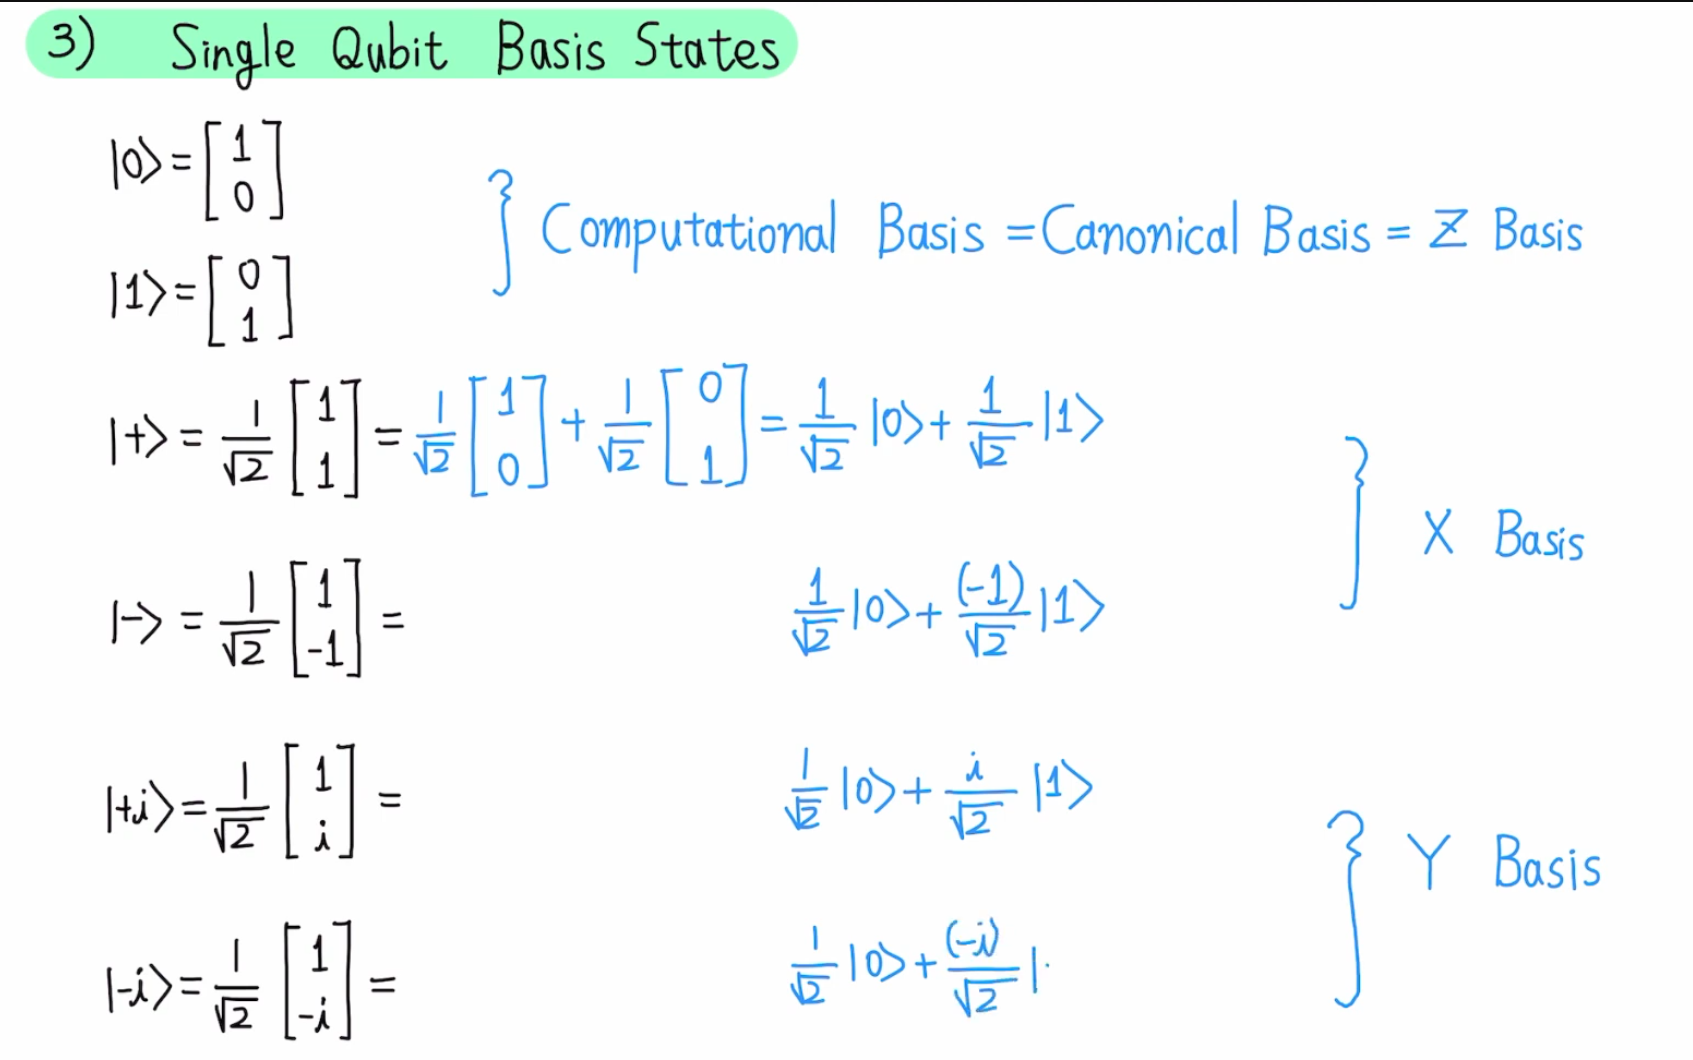

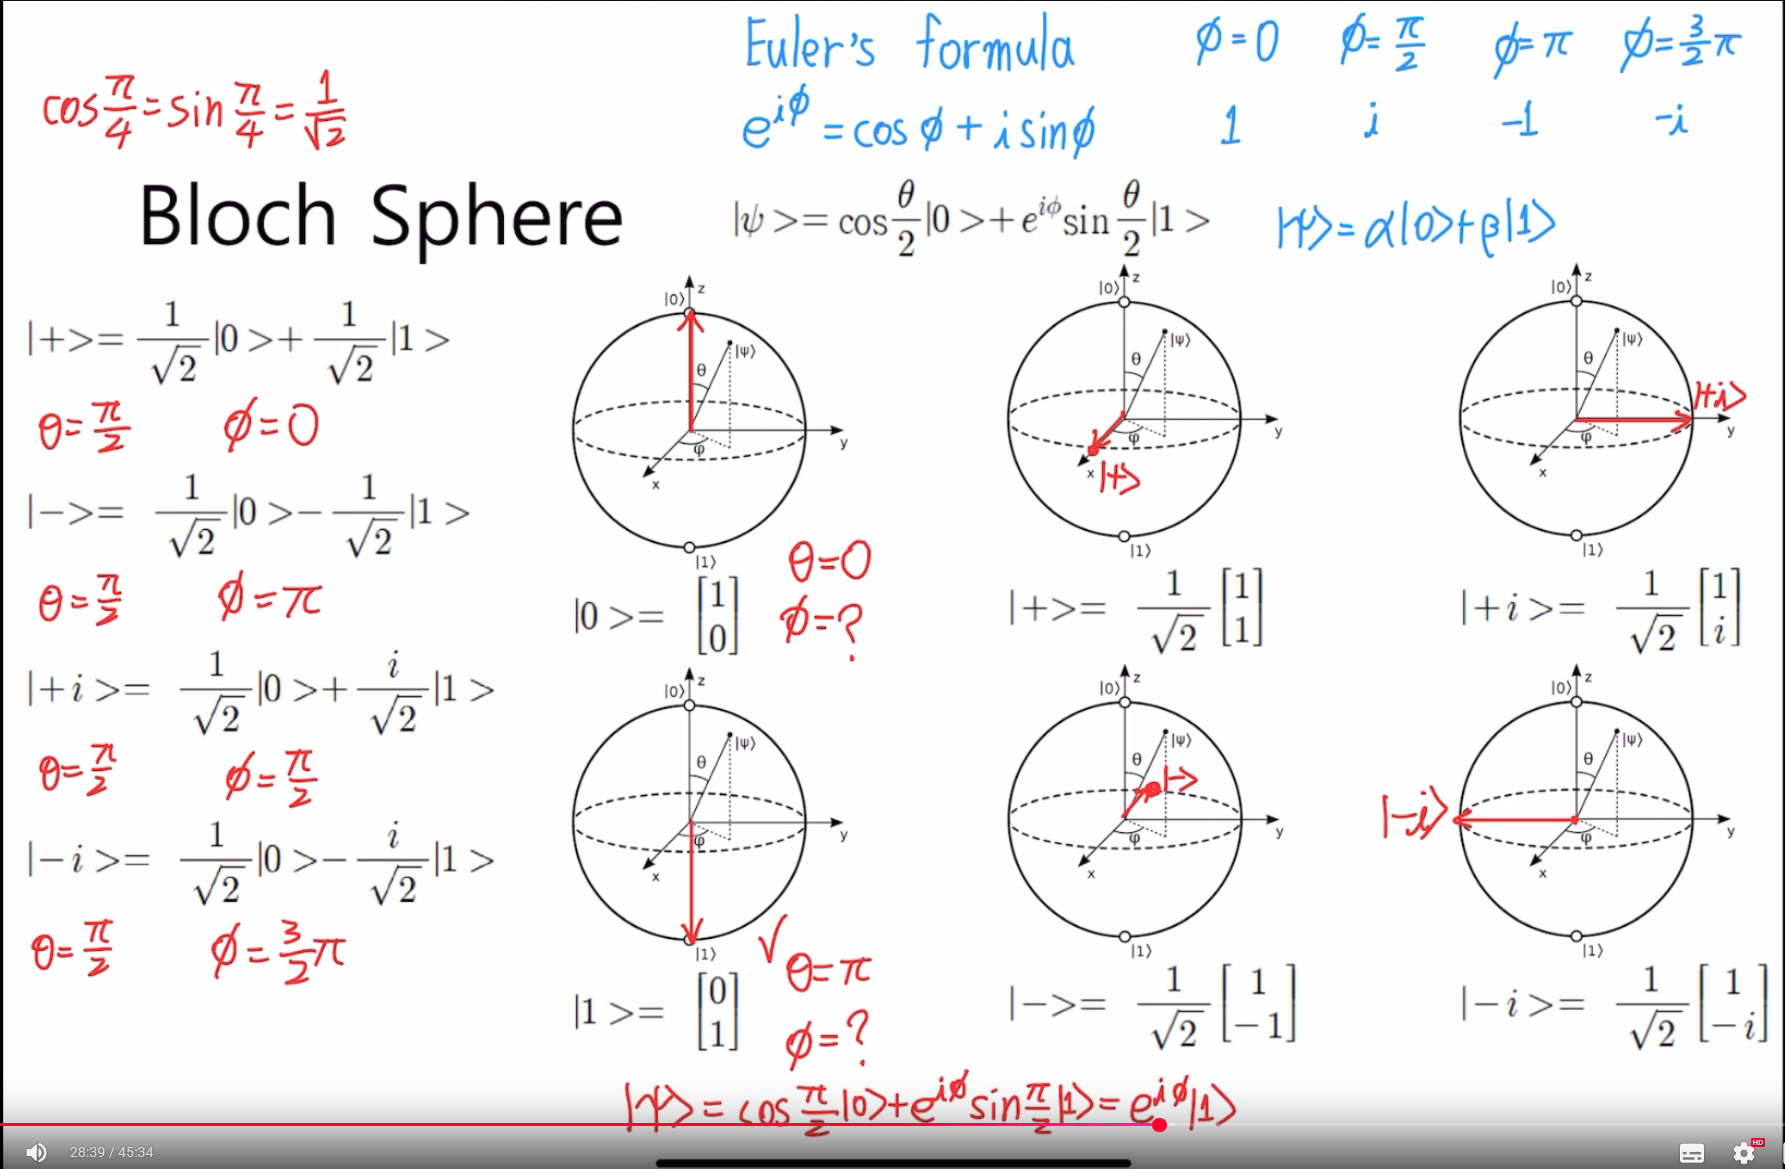

{Grok: "양자 상태의 물리적 특성(확률, 기대값 등)"에서 확률과 기대값의 정확한 의미와 이 두 가지를 알아낼 수 있는 방법과 X, Y, Z 연산자의 기대값을 Qiskit을 통해 구현해 주세요.}

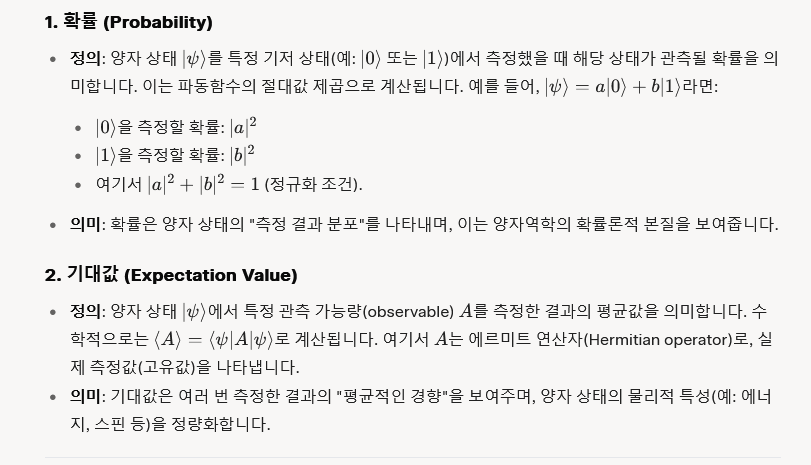

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e5693752a86800b6811c5b07c04ace680b743d80c7f878d9d19319d085b0cbb1
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.5 MB/s eta 0:00:00
  Cloning https://github.com/qiski

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

In [3]:
# 1. 양자 회로 생성
qc3 = QuantumCircuit(1)
qc3.initialize([0.6, 0.8], 0)  # |ψ⟩ = 0.6|0⟩ + 0.8|1⟩ (정규화 필요)

# 2. 상태 벡터 얻기
state = Statevector.from_instruction(qc3)
a, b = state.data
print(f"상태: {state}")
print(f"P(|0⟩) = |a|^2 = {abs(a)**2:.3f}")
print(f"P(|1⟩) = |b|^2 = {abs(b)**2:.3f}")

상태: Statevector([0.6+0.j, 0.8+0.j],
            dims=(2,))
P(|0⟩) = |a|^2 = 0.360
P(|1⟩) = |b|^2 = 0.640


(참고: 이 경우 ∣a∣^2+∣b∣^2=1을 만족하도록 초기 벡터를 [0.6/1,0.8/1][0.6/1
​,0.8/1
​]로 정규화해야 정확합니다.)

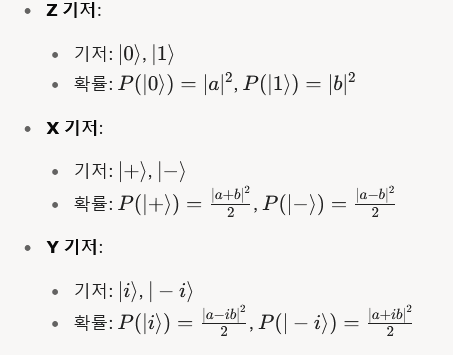

In [ ]:
# 1. 양자 회로 생성
qc = QuantumCircuit(1)  # 1개의 큐비트

# 2. 양자 상태 초기화 (theta = pi/4로 설정)
theta = np.pi / 4
qc.ry(theta, 0)  # Ry 게이트로 |ψ⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩ 상태 생성

# 3. 상태 벡터 얻기
state = Statevector.from_instruction(qc)
psi = state.data  # 상태 벡터: [a, b] where |ψ⟩ = a|0⟩ + b|1⟩
print("양자 상태:", psi)

# 4. 파울리 연산자 정의
pauli_z = np.array([[1, 0], [0, -1]])  # Z 행렬
pauli_x = np.array([[0, 1], [1, 0]])  # X 행렬
pauli_y = np.array([[0, -1j], [1j, 0]])  # Y 행렬

# 5. 기대값 계산: <ψ|A|ψ> = ψ† A ψ
# ψ†는 켤레 전치 (conjugate transpose), ψ는 열 벡터
psi_dagger = np.conjugate(psi)  # ψ†

# Z 기대값
expectation_z = np.dot(psi_dagger, np.dot(pauli_z, psi)).real
print(f"Z 연산자의 기대값: {expectation_z:.3f}")

# X 기대값
expectation_x = np.dot(psi_dagger, np.dot(pauli_x, psi)).real
print(f"X 연산자의 기대값: {expectation_x:.3f}")

# Y 기대값
expectation_y = np.dot(psi_dagger, np.dot(pauli_y, psi)).real
print(f"Y 연산자의 기대값: {expectation_y:.3f}")

# 6. 이론적 확인 (참고용)
# |ψ⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩ 일 때:
# <Z> = cos(θ), <X> = sin(θ), <Y> = 0
theta_val = theta
print("\n이론적 기대값 (참고):")
print(f"<Z> = cos(θ) = {np.cos(theta_val):.3f}")
print(f"<X> = sin(θ) = {np.sin(theta_val):.3f}")
print(f"<Y> = 0 = {0:.3f}")

양자 상태: [0.92387953+0.j 0.38268343+0.j]
Z 연산자의 기대값: 0.707
X 연산자의 기대값: 0.707
Y 연산자의 기대값: 0.000

이론적 기대값 (참고):
<Z> = cos(θ) = 0.707
<X> = sin(θ) = 0.707
<Y> = 0 = 0.000


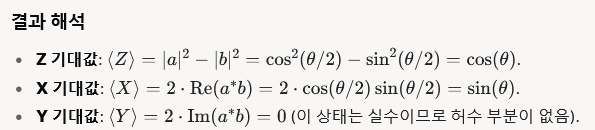

* np.linalg.eig (일반 행렬), np.linalg.eigh (에르미트/대칭 행렬) 등으로 자동 계산.
* 내부적으로 QR 알고리즘 등을 사용.

In [ ]:
# Pauli 행렬 정의
pauli_x = np.array([[0, 1], [1, 0]])
pauli_y = np.array([[0, -1j], [1j, 0]])
pauli_z = np.array([[1, 0], [0, -1]])

# 고유값 분해 함수
def eigen_decomposition(matrix, name):
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)  # eigh는 Hermitian 행렬용
    print(f"\n{name} 연산자:")
    print("고유값:", eigenvalues)
    print("고유벡터 (열 벡터):")

    for i in range(len(eigenvalues)):
        print(f"  고유값 {eigenvalues[i]}에 대응: {eigenvectors[:, i]}")
    ###for

    return eigenvalues, eigenvectors
###def

# X, Y, Z에 대해 고유값 분해 수행
eigen_x = eigen_decomposition(pauli_x, "Pauli-X")
eigen_y = eigen_decomposition(pauli_y, "Pauli-Y")
eigen_z = eigen_decomposition(pauli_z, "Pauli-Z")


Pauli-X 연산자:
고유값: [-1.  1.]
고유벡터 (열 벡터):
  고유값 -1.0에 대응: [-0.70710678  0.70710678]
  고유값 1.0에 대응: [0.70710678 0.70710678]

Pauli-Y 연산자:
고유값: [-1.  1.]
고유벡터 (열 벡터):
  고유값 -1.0에 대응: [-0.70710678+0.j          0.        +0.70710678j]
  고유값 1.0에 대응: [-0.70710678+0.j          0.        -0.70710678j]

Pauli-Z 연산자:
고유값: [-1.  1.]
고유벡터 (열 벡터):
  고유값 -1.0에 대응: [0. 1.]
  고유값 1.0에 대응: [1. 0.]


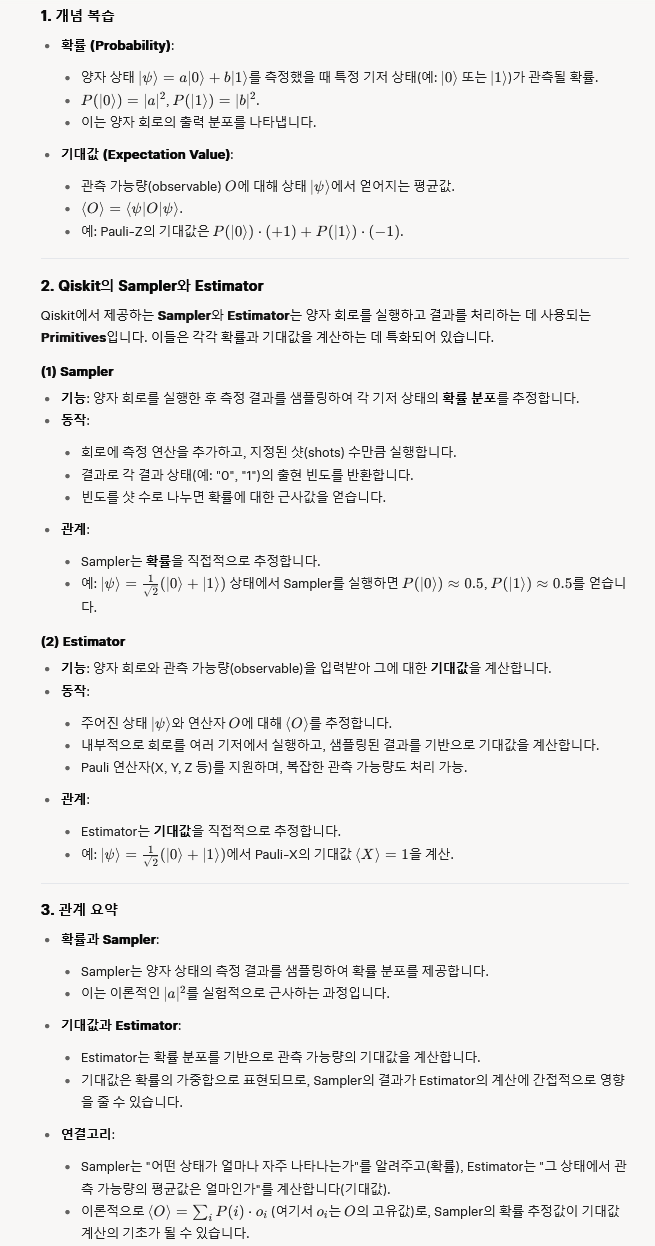

Sampler 결과 (확률 분포): {0: np.float64(0.494), 1: np.float64(0.506)}


<ipython-input-14-983deeaa5955>:10: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


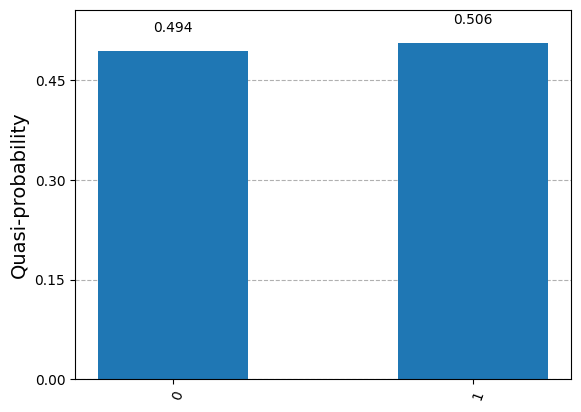

In [ ]:
from qiskit.primitives import Sampler, Estimator
from qiskit.quantum_info import SparsePauliOp

# 1. 양자 회로 생성
qc = QuantumCircuit(1)
qc.h(0)  # H 게이트로 |ψ⟩ = 1/√2(|0⟩ + |1⟩) 상태 생성
qc.measure_all()  # 측정 추가

# 2. Sampler로 확률 계산
sampler = Sampler()
job = sampler.run(qc, shots=1000)
result = job.result()
quasi_dist = result.quasi_dists[0]  # 준확률 분포
print("Sampler 결과 (확률 분포):", quasi_dist)
plot_histogram(quasi_dist)


In [ ]:
# 1. 양자 회로 생성
qc2 = QuantumCircuit(1)
qc2.h(0)  # H 게이트로 |ψ⟩ = 1/√2(|0⟩ + |1⟩) 상태 생성
#qc2.measure_all()  # 측정 추가


# 3. Estimator로 기대값 계산 (Pauli-X)
estimator = Estimator()
#observable = SparsePauliOp("X")  # Pauli-X 연산자
#job_est = estimator.run(qc2.remove_final_measurements(inplace=False), observables=[observable])
#expectation_value = job_est.result().values[0]
#print("X 연산자의 기대값:", expectation_value)

# 추가: Pauli-Y, Z 기대값
observables = [SparsePauliOp("X"), SparsePauliOp("Y"), SparsePauliOp("Z")]
job_est_multi = estimator.run([qc2]*3, observables=observables)
exp_x, exp_y, exp_z = job_est_multi.result().values
print("X 연산자의 기대값:", exp_x)
print("Y 연산자의 기대값:", exp_y)
print("Z 연산자의 기대값:", exp_z)

X 연산자의 기대값: 0.9999999999999998
Y 연산자의 기대값: 0.0
Z 연산자의 기대값: 0.0


<ipython-input-21-e944790fe35d>:8: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


{Grok: Z, X, Y 순으로 기저, 기저상태, 확률, 기대값으로 요약해 주세요}

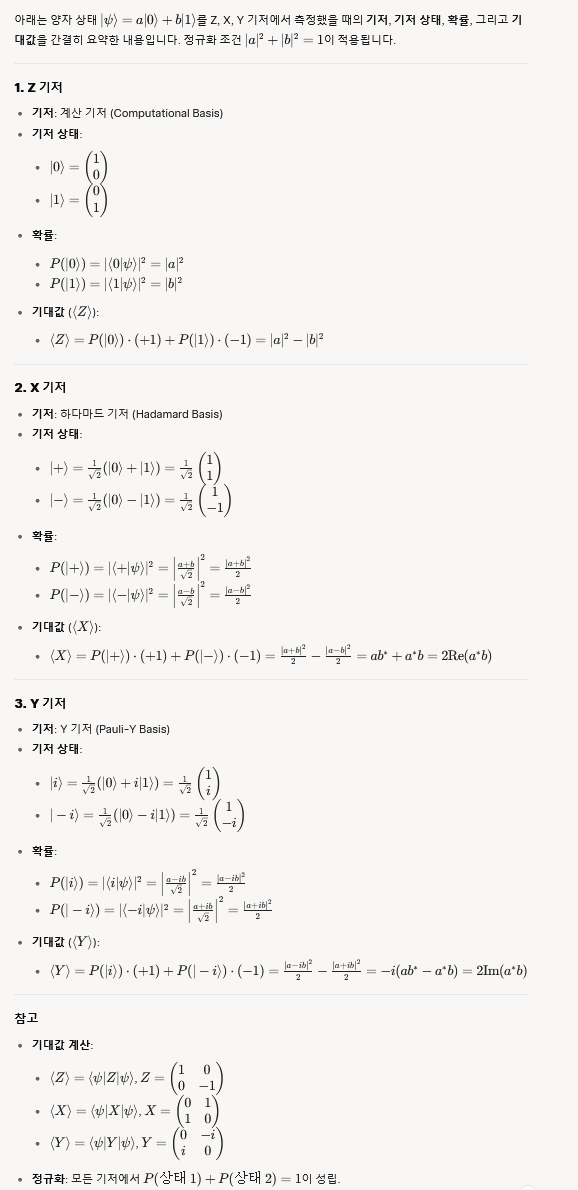